Welcome to university study seat booking system!
Please log in first.
Student number: S10001
Password: pass1
Login successful! Welcome back Richard Johnson.
1. Book a study seat.
2. View my bookings.
3. My preference analysis.
4. Log out.
Please choose 1/2/3/4:1
Please choose a building (A, B, C, D): A
Please choose a date (yyyy-mm-dd): 2024-12-20
Available time slots:
1. 8:00-10:00
2. 10:00-12:00
3. 12:00-14:00
4. 14:00-16:00
5. 16:00-18:00
6. 18:00-20:00
7. 20:00-22:00
Please choose a time slot by entering a number: 2
You already have a booking for 2024-12-20 at 10:00-12:00. You cannot book another seat in the same time slot.
Please choose a building (A, B, C, D): B
Please choose a date (yyyy-mm-dd): 2024-12-21
Available time slots:
1. 8:00-10:00
2. 10:00-12:00
3. 12:00-14:00
4. 14:00-16:00
5. 16:00-18:00
6. 18:00-20:00
7. 20:00-22:00
Please choose a time slot by entering a number: 2
Available seats in Building B on 2024-12-21 during 10:00-12:00:
1. Seat 21
2. Seat 22
3. Seat 23
4. S

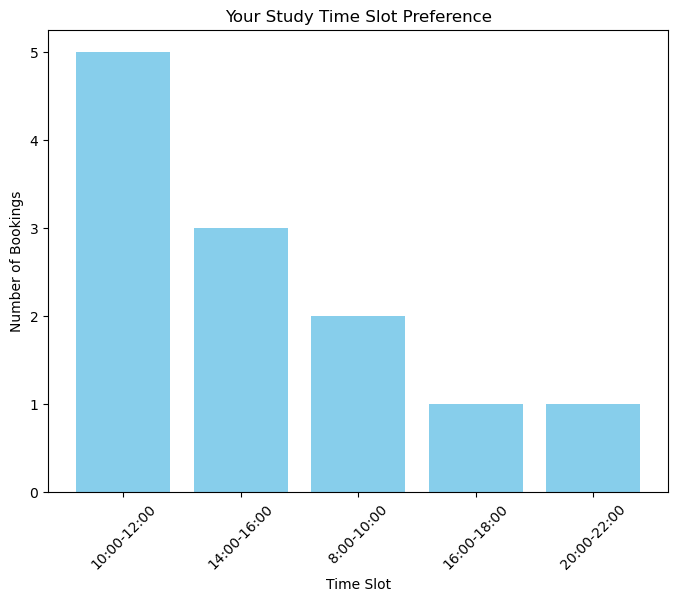

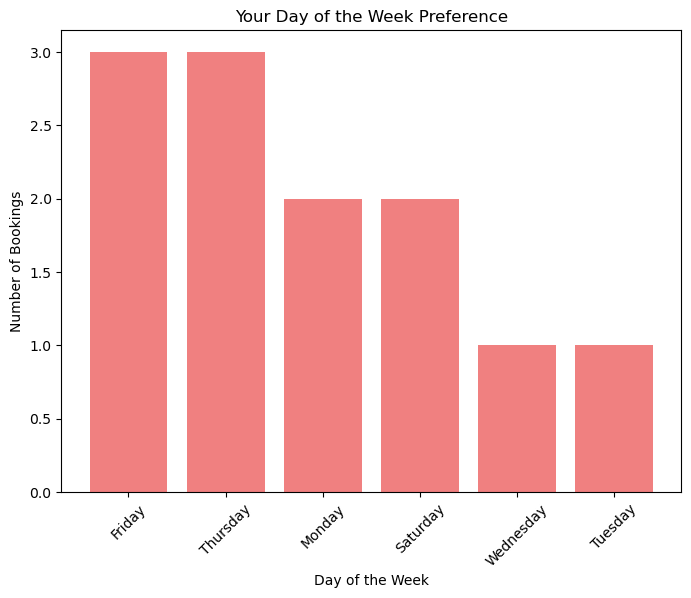

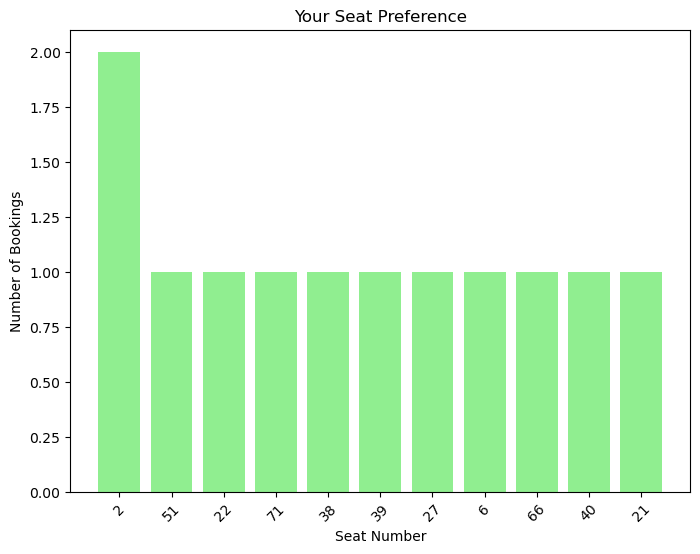

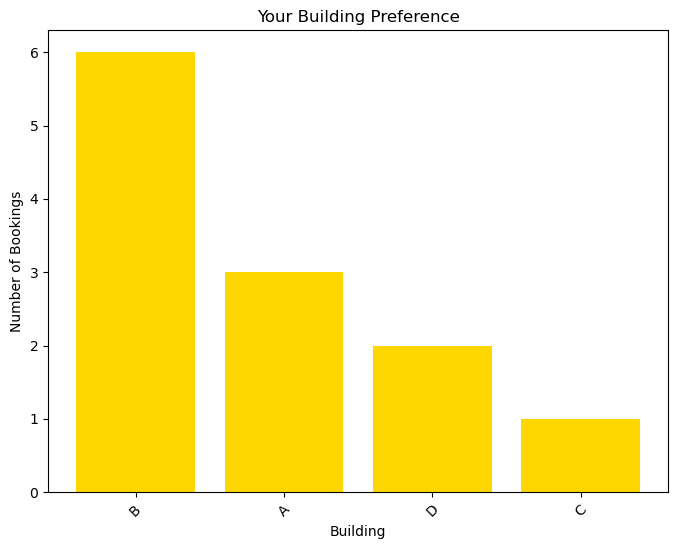

1. Book a study seat.
2. View my bookings.
3. My preference analysis.
4. Log out.
Please choose 1/2/3/4:4
Logged out.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

# Student Class
class student:
    def __init__(self, student_number, name, password):
        self.sn = student_number
        self.name = name
        self.password = password
    
    @staticmethod
    def load_student_data(file_path):
        students = {}
        try:
            df = pd.read_csv(file_path)
            for _, row in df.iterrows():
                student_number = row['student_number']
                name = row['name']
                password = row['password']
                students[student_number] = student(student_number, name, password)
        except Exception as e:
            print(f"Error loading student data: {e}")
        return students

sd = student.load_student_data('student.csv')

# Seat Class
class Seat:
    def __init__(self, seat_number, building):
        self.seat_number = seat_number
        self.building = building

    # Function to read seat information from the seat_data.csv file and load into Seat objects
    @staticmethod
    def load_seat_data(file_path):
        seats = []
        try:
            df = pd.read_csv(file_path)
            for _, row in df.iterrows():
                seat_number = row['seat_number']
                building = row['building']
                seats.append(Seat(seat_number,building))
        except Exception as e:
            print(f"Error loading seat data: {e}")
        return seats

all_seats = Seat.load_seat_data('seat_data.csv')

# Function to read the bookings from the bookings.csv file and load seat booking records into memory
def read_bookings():
    bookings = []
    try:
        df = pd.read_csv('bookings.csv', encoding='utf-8')
        bookings = df.values.tolist()  # Convert the DataFrame into a list of lists
    except FileNotFoundError:
        return []  # If the file does not exist yet, return an empty list
    return bookings

# Function to write a new booking to the CSV file
def write_booking(booking_details):
    try:
        try: # Load the existing bookings, if any
            df = pd.read_csv('bookings.csv', encoding='utf-8', header=None, 
                             names=['seat_number', 'building', 'date', 'time_slot', 'student_number'])
        except FileNotFoundError:
            # If the file does not exist, create an empty DataFrame with specified columns
            df = pd.DataFrame(columns=['seat_number', 'building', 'date', 'time_slot', 'student_number'])
        
        # Create a new DataFrame for the new booking
        new_booking = pd.DataFrame([{
            'seat_number': booking_details[0],
            'building': booking_details[1],
            'date': booking_details[2],
            'time_slot': booking_details[3],
            'student_number': booking_details[4]
        }])

        # Append the new booking to the existing DataFrame
        updated_df = pd.concat([df, new_booking], ignore_index=True)

        # Save the updated DataFrame back to the CSV file
        updated_df.to_csv('bookings.csv', index=False, header=False, encoding='utf-8')

    except Exception as e:
        print(f"Error writing to the booking file: {e}")

# Function to delete a booking from the CSV file
def delete_booking(booking_details):
    try:
        try:
            df = pd.read_csv('bookings.csv', encoding='utf-8', header=None, 
                             names=['seat_number', 'building', 'date', 'time_slot', 'student_number'])
        except FileNotFoundError:
            print("Booking file not found. Please ensure the file exists.")
            return

        # Define a condition to find the booking to delete
        condition = (
            (df['seat_number'] == booking_details[0]) &
            (df['building'] == booking_details[1]) &
            (df['date'] == booking_details[2]) &
            (df['time_slot'] == booking_details[3]) &
            (df['student_number'] == booking_details[4])
        )

        # Check if the booking exists in the DataFrame
        if not df[condition].empty:
            # Remove the selected booking
            df = df[~condition]

            # Save the updated DataFrame back to the CSV file (without the header)
            df.to_csv('bookings.csv', index=False, header=False, encoding='utf-8')

            print(f"Booking for Seat {booking_details[0]}, Building: {booking_details[1]}, Date: {booking_details[2]}, Time Slot: {booking_details[3]} cancelled.")
        else:
            print("No matching booking found to delete.")

    except Exception as e:
        print(f"Error deleting from the booking file: {e}")
        
# Custom bubble sort for the bookings of a student
def bubble_sort(bookings):
    time_slots_map = {
    '8:00-10:00': 0,
    '10:00-12:00': 1,
    '12:00-14:00': 2,
    '14:00-16:00': 3,
    '16:00-18:00': 4,
    '18:00-20:00': 5,
    '20:00-22:00': 6
}
    
    n = len(bookings)
    for i in range(n):
        for j in range(0, n-i-1):
            booking1_date = datetime.strptime(bookings[j][2], "%Y-%m-%d")
            booking1_time_slot = time_slots_map[bookings[j][3]]  # Convert time slot to integer
            booking2_date = datetime.strptime(bookings[j+1][2], "%Y-%m-%d")
            booking2_time_slot = time_slots_map[bookings[j+1][3]]  # Convert time slot to integer

            if (booking1_date > booking2_date) or (booking1_date == booking2_date and booking1_time_slot > booking2_time_slot):# Compare first by date, then by time slot
                bookings[j], bookings[j+1] = bookings[j+1], bookings[j]# Swap the elements if they're in the wrong order
    return bookings

def linear_search_seat(building_seats,booked_seats_number):
    available_seats_for_booking = []
    for seat in building_seats:
        if str(seat.seat_number) not in booked_seats_number:
            available_seats_for_booking.append(seat)
    return available_seats_for_booking

def login():
    print('Welcome to university study seat booking system!\nPlease log in first.')
    
    # Loop until successful login
    while True:
        username = input('Student number: ')
        password = input('Password: ')
        
        # Check if student number exists and matches the password
        if username in sd:  # Check if student number exists in the dictionary
            if sd[username].password == password:  # Check if password matches
                print(f'Login successful! Welcome back {sd[username].name}.')
                booking_system(sd[username])  # Pass the student object to the booking system
                return sd[username]  # Return the student object if login is successful
            else:
                print('Invalid password. Please try again.')
        else:
            print('Invalid student number. Please try again.')

# Function to offer a main menu with four choices
def booking_system(student_obj):
    print('1. Book a study seat.')
    print('2. View my bookings.')
    print('3. My preference analysis.')
    print('4. Log out.')
    choice = input('Please choose 1/2/3/4:')
    
    if choice == '1':
        seat_booking(student_obj)
    elif choice == '2':
        view(student_obj)
    elif choice == '3':
        analysis(student_obj)
    elif choice == '4':
        print('Logged out.')
    else:
        print("Invalid choice. Please try again.")
        booking_system(student_obj)

# Function to handle the seat booking
def seat_booking(student_obj):
    today = datetime.today().date()  # Get today's date
    current_time = datetime.now().time()  # Get the current time
    
    # Time slots with start times
    time_slots_list = {
        '1': {'time': '8:00-10:00', 'start_time': datetime.strptime('08:00', '%H:%M').time()},
        '2': {'time': '10:00-12:00', 'start_time': datetime.strptime('10:00', '%H:%M').time()},
        '3': {'time': '12:00-14:00', 'start_time': datetime.strptime('12:00', '%H:%M').time()},
        '4': {'time': '14:00-16:00', 'start_time': datetime.strptime('14:00', '%H:%M').time()},
        '5': {'time': '16:00-18:00', 'start_time': datetime.strptime('16:00', '%H:%M').time()},
        '6': {'time': '18:00-20:00', 'start_time': datetime.strptime('18:00', '%H:%M').time()},
        '7': {'time': '20:00-22:00', 'start_time': datetime.strptime('20:00', '%H:%M').time()},
    }
   
    # Get student choice for building
    building = input("Please choose a building (A, B, C, D): ").upper()
    if building not in ['A', 'B', 'C', 'D']:
        print("Invalid building. Please try again.")
        return seat_booking(student_obj)  # Retry if invalid input

    # Ask for student choice for date
    while True:
        date_str = input(f"Please choose a date (yyyy-mm-dd): ")
        try:
            date = datetime.strptime(date_str, '%Y-%m-%d').date()
            if date >= today: # To ensure it's not earlier than today
                break
            else:
                print("The date cannot be earlier than today. Try again.")
        except ValueError:
            print("Invalid date format. Please enter the date in yyyy-mm-dd format.")
    
    # Filter time slots to only show future time slots
    if date == today:
        available_time_slots = {k: v for k, v in time_slots_list.items() if v['start_time'] > current_time}
        if not available_time_slots:
            print('No availble seat today.')
            return seat_booking(student_obj)
        else:
            print("Available time slots:")
            for key, value in available_time_slots.items():
                print(f"{key}. {value['time']}")
            time_slot_number = input("Please choose a time slot by entering a number: ")
    else:
        available_time_slots = {k: v for k, v in time_slots_list.items()}
        print("Available time slots:")
        for key, value in available_time_slots.items():
            print(f"{key}. {value['time']}")
        time_slot_number = input("Please choose a time slot by entering a number: ")
    
    # Validate the input
    if time_slot_number not in available_time_slots:
        print("Invalid time slot. Please try again.")
        return seat_booking(student_obj)  # Recursively call the function to try again

    # Get the corresponding time slot
    time_slot = available_time_slots[time_slot_number]['time']

    # Load the bookings and filter those that match the building, date, and time slot
    bookings = read_bookings()
    # Step 1: Check if the student already has a booking for the selected date and time slot
    for booking in bookings:
        if booking[4] == student_obj.sn and booking[2] == str(date) and booking[3] == time_slot:
            print(f"You already have a booking for {date} at {time_slot}. You cannot book another seat in the same time slot.")
            return seat_booking(student_obj)  # Prevent further booking and exit the function

    # Step 2: Collect booked seat numbers
    booked_seats_number = set()
    for booking in bookings:
        if booking[1] == building and booking[2] == str(date) and booking[3] == time_slot:
            booked_seats_number.add(booking[0])  # Collect booked seat numbers

    # Filter seats by the selected building
    building_seats = [seat for seat in all_seats if seat.building == building]
    
    available_seats_for_booking = linear_search_seat(building_seats,booked_seats_number)

    if not available_seats_for_booking:
        print(f"No available seats in Building {building} on {date} during {time_slot}.")
        return

    print(f"Available seats in Building {building} on {date} during {time_slot}:")
    for idx, seat in enumerate(available_seats_for_booking, 1):
        print(f"{idx}. Seat {seat.seat_number}")

    # Choose a seat
    while True:
        try:
            choice = int(input(f"Select a seat (1-{len(available_seats_for_booking)}): "))
            if 1 <= choice <= len(available_seats_for_booking):
                selected_seat = available_seats_for_booking[choice - 1]
                break
            else:
                print("Invalid choice. Please try again.")
        except ValueError:
            print("Please enter a valid number.")

    # Confirm the booking
    print(f"Booking confirmed for Building {building}, Seat {selected_seat.seat_number}, on {date} from {time_slot}.")

    # Store the booking in the Seat object and the CSV file
    booking_details = [selected_seat.seat_number, building, str(date), time_slot, student_obj.sn]
    write_booking(booking_details)

    print("Booked successfully!")
    booking_system(student_obj)

# Function to view and cancel bookings
def view(student_obj):
    bookings = read_bookings()
    student_bookings_unsorted = [booking for booking in bookings if booking[4] == student_obj.sn]
    global student_bookings
    student_bookings = bubble_sort(student_bookings_unsorted)

    if not student_bookings:
        print("You have no bookings.")
        return booking_system(student_obj)

    print("Your bookings:")
    for idx, booking in enumerate(student_bookings, 1):
        print(f"{idx}. Seat: {booking[0]}, Building: {booking[1]}, Date: {booking[2]}, Time Slot: {booking[3]}")
        
    print('Do you want to cancel a booking or go back to main menu?')
    cancel_back = input('Enter 1 to cancel a booking.Enter 0 to go back to main menu.')
    if cancel_back == '1':
        cancel_booking(student_obj)
    elif cancel_back == '0':
        booking_system(student_obj)
    else:
        print('Invaild choice. Please choose again.')
        view(student_obj)

# Function to cancel the booking in the CSV file
def cancel_booking(student_obj):
    today = datetime.today().date()  # Get today's date
    current_time = datetime.now().time()  # Get the current time
    bookings = read_bookings()
    
    time_slots_map = {
    '8:00-10:00': datetime.strptime('08:00', '%H:%M').time(),
    '10:00-12:00': datetime.strptime('10:00', '%H:%M').time(),
    '12:00-14:00': datetime.strptime('12:00', '%H:%M').time(),
    '14:00-16:00': datetime.strptime('14:00', '%H:%M').time(),
    '16:00-18:00': datetime.strptime('16:00', '%H:%M').time(),
    '18:00-20:00': datetime.strptime('18:00', '%H:%M').time(),
    '20:00-22:00': datetime.strptime('20:00', '%H:%M').time()
} 
    
    future_bookings = [
        booking for booking in student_bookings
        if datetime.strptime(booking[2], "%Y-%m-%d").date() > today or 
        (datetime.strptime(booking[2], "%Y-%m-%d").date() == today and 
         time_slots_map[booking[3]] > current_time)
    ] #Filter bookings in the future for student to cancel

    if not future_bookings:
        print("You have no upcoming bookings to cancel.")
        return booking_system(student_obj)
    
    print("Your future bookings:")
    for idx, booking in enumerate(future_bookings, 1):
        print(f"{idx}. Seat: {booking[0]}, Building: {booking[1]}, Date: {booking[2]}, Time Slot: {booking[3]}")
    
    while True:
        cancel_choice = int(input("Enter the number of the booking to cancel: "))
        try:            
            if 1 <= cancel_choice <= len(future_bookings):
                booking_to_cancel = future_bookings[cancel_choice - 1]
                confirmation = input(f"Confirm cancellation of Seat {booking_to_cancel[0]}， Building: {booking_to_cancel[1]}, Date: {booking_to_cancel[2]}, Time Slot: {booking_to_cancel[3]} (yes/no): ")
                if confirmation.lower() == 'yes':
                    delete_booking(booking_to_cancel)
                    view(student_obj)
                    break
                elif confirmation.lower() == 'no':
                    cancel_booking(student_obj)
                    break
                else:
                    print('Invalid choice. Please try again.')
            else:
                print("Invalid choice.Please try again.")
        except ValueError:
            print("Invalid input. Please try again.")
            view(student_obj)

# Function to analysis the student's study preferences
def analysis(student_obj):
    bookings = read_bookings()
    student_bookings = [booking for booking in bookings if booking[4] == student_obj.sn]

    if not student_bookings:
        print("No bookings found for analysis.")
        return booking_system(student_obj)

    # 1. Study Time Slot Preference
    time_slots = [booking[3] for booking in student_bookings]
    time_slot_counts = Counter(time_slots)
    sorted_time_slot_counts = sorted(time_slot_counts.items(), key=lambda x: x[1], reverse=True)
    time_slots, counts = zip(*sorted_time_slot_counts)

    plt.figure(figsize=(8, 6))
    plt.bar(time_slots, counts, color='skyblue')
    plt.title('Your Study Time Slot Preference')
    plt.xlabel('Time Slot')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45)
    plt.show()

    # 2. Day of the Week Preference
    days_of_week = [datetime.strptime(booking[2], "%Y-%m-%d").strftime('%A') for booking in student_bookings]
    day_counts = Counter(days_of_week)
    sorted_day_counts = sorted(day_counts.items(), key=lambda x: x[1], reverse=True)
    days, day_count_values = zip(*sorted_day_counts)

    plt.figure(figsize=(8, 6))
    plt.bar(days, day_count_values, color='lightcoral')
    plt.title('Your Day of the Week Preference')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Seat Preference
    seat_numbers = [booking[0] for booking in student_bookings]
    seat_counts = Counter(seat_numbers)
    sorted_seat_counts = sorted(seat_counts.items(), key=lambda x: x[1], reverse=True)
    seats, seat_count_values = zip(*sorted_seat_counts)

    plt.figure(figsize=(8, 6))
    plt.bar(seats, seat_count_values, color='lightgreen')
    plt.title('Your Seat Preference')
    plt.xlabel('Seat Number')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45)
    plt.show()

    # 4. Building Preference
    buildings = [booking[1] for booking in student_bookings]
    building_counts = Counter(buildings)
    sorted_building_counts = sorted(building_counts.items(), key=lambda x: x[1], reverse=True)
    buildings, building_count_values = zip(*sorted_building_counts)

    plt.figure(figsize=(8, 6))
    plt.bar(buildings, building_count_values, color='gold')
    plt.title('Your Building Preference')
    plt.xlabel('Building')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45)
    plt.show()

    # Return to booking system after analysis
    booking_system(student_obj)

login()